# Machine Learning Project: Assessment 2

## 1. Aims, objectives and plan

### a) Aims and objectives
The aim of this project is to apply machine learning techniques to predict the potability of water based on its chemical characteristics. Ensuring access to safe drinking water is a critical public health concern, and machine learning models offer an efficient and scalable approach to classify and predict water quality. The project focuses on implementing and comparing two prominent machine learning models: Support Vector Machine (SVM) and Neural Network Classification. The goal is to evaluate how effectively these models can predict water potability and analyze their performance in terms of accuracy, interpretability, and computational efficiency.

#### Objectives:

Data Preprocessing: Clean the dataset by handling missing values and normalizing the features to prepare them for machine learning models.

Support Vector Machine (SVM): Implement SVM using an RBF kernel, tuning hyperparameters like C and gamma to optimize model performance.

Neural Network Classification: Design and implement a Neural Network model with multiple hidden layers, leveraging techniques like dropout and batch normalization to mitigate overfitting and improve accuracy.

Hyperparameter Tuning: Optimize the hyperparameters for both SVM and Neural Network models using methods like GridSearchCV to improve performance and efficiency.

Model Evaluation: Compare the models using metrics such as accuracy, precision, recall, F1-score, and confusion matrix to assess their classification performance.

Visualization and Insights: Visualize model performance and provide insights into which chemical properties (e.g., pH, Hardness, Solids) most influence water potability predictions.

Technical Report: Present a detailed technical report summarizing the methodology, results, and comparative analysis of both models, along with reflections on performance and decision-making.

###  b) Plan
The project was conducted through a structured series of stages. Initially, the dataset was preprocessed, involving the cleaning of missing values and normalization of the features to ensure consistency and compatibility with the machine learning algorithms. The first model implemented was the Support Vector Machine (SVM) with an RBF kernel, followed by the design and training of a Neural Network classifier. Hyperparameter tuning for both models was performed using GridSearchCV to refine model performance. The models were evaluated based on several key metrics, including accuracy, precision, recall, and F1-score. Finally, the results were visualized and compared, with insights drawn into the effectiveness of each model in predicting water potability. The project concluded with a comprehensive report, highlighting the strengths and weaknesses of both models in this application.

## 2. Understanding the case study

###  Case study analysis
The dataset selected for this case study focuses on water potability, containing various chemical attributes that influence whether water is safe for consumption. The dataset provides key chemical properties such as pH, hardness, solids, chloramines, and others, which form the basis for predicting water quality. After exploring the dataset, the following key points were identified, and appropriate strategies were devised to handle them:

1. Missing Values: Some columns, including pH and Sulfate, contain missing values. Since these are critical chemical properties that affect water potability, the missing data must be handled carefully. We will impute missing values by using statistical methods like the mean or median, ensuring that the model can still use these features without introducing bias.

2. Imbalanced Classes: The dataset has a class imbalance issue, where the majority of samples belong to the "non-potable" water class. This imbalance can lead to models being biased toward the majority class, reducing predictive power for minority (potable) samples. Techniques such as oversampling the minority class or undersampling the majority class will be employed, along with careful metric selection, such as using F1-score and balanced accuracy instead of just accuracy.

3. Feature Scaling: Features in the dataset, such as hardness, solids, and organic carbon, have vastly different ranges, which can skew model performance. To ensure that all features are treated equally by machine learning algorithms, feature scaling techniques like Min-Max normalization or standardization will be applied to bring all variables into the same range, enhancing the effectiveness of models such as Neural Networks.

4. Outliers: Preliminary data analysis indicates that some attributes, such as solids and organic carbon, have extreme values that could potentially be outliers. These outliers could distort the learning process of models like Logistic Regression or Neural Networks. We will apply outlier detection and removal methods or transform the data to reduce the impact of extreme values.

By addressing these key points, we will ensure that the dataset is prepared optimally for use in Neural Network Classification and Support Vector Machine (SVM), allowing both models to perform efficiently and effectively.



## 3. Dataset description

#### Data Source: https://www.kaggle.com/code/uom190346a/models-for-water-potability-baselines/input?select=water_potability.csv
the data has been taken from Kaggle website.

The water potability dataset used in this project consists of 3,276 samples and 10 features, with each sample representing a different water source. The target variable, "Potability," is a binary label, with 0 indicating non-potable water and 1 indicating potable water. The features in the dataset include various chemical measurements, such as pH, hardness, solids, and other properties relevant to water quality.

#### Key Features:
1. pH: Measures the acidity or basicity of the water.
2. Hardness: Amount of dissolved calcium and magnesium ions.
3. Solids: Total dissolved solids (TDS) in the water.
4. Chloramines: Disinfectants used to control harmful bacteria.
5. Sulfate: Measure of dissolved sulfate concentration.
6. Conductivity: Water's ability to conduct electricity, related to ion concentration.
7. Organic Carbon: Measure of carbon compounds in water.
8. Trihalomethanes: Chemicals that can form during water disinfection.
9. Turbidity: Cloudiness or haziness of the water, affecting its clarity.

#### Preprocessing Steps:
Handling Missing Values: Some columns, like pH and sulfate, contain missing values. These were imputed using the median of each feature to ensure minimal bias in model training.
Feature Scaling: The features in the dataset exhibit different scales. For example, the solids feature has values in the thousands, while pH ranges between 0 and 14. All features were normalized using Min-Max scaling to bring them within a range of 0 to 1, improving the model’s performance.
Outlier Detection: Some features, such as solids and organic carbon, contained extreme outliers. These were capped or removed to prevent distortion in the training process.
Class Imbalance: The dataset is slightly imbalanced, with more non-potable water samples than potable ones. To address this, we applied SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset before training the models.

In [30]:
# Plot an overview figure of the data or sample data with examples.

#Importing the dataset
import pandas as pd

data = pd.read_csv('water_potability.csv')
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

  0%|                                                                                                                                                                                         | 0/100 [27:05<?, ?it/s]


<Figure size 1400x1000 with 0 Axes>

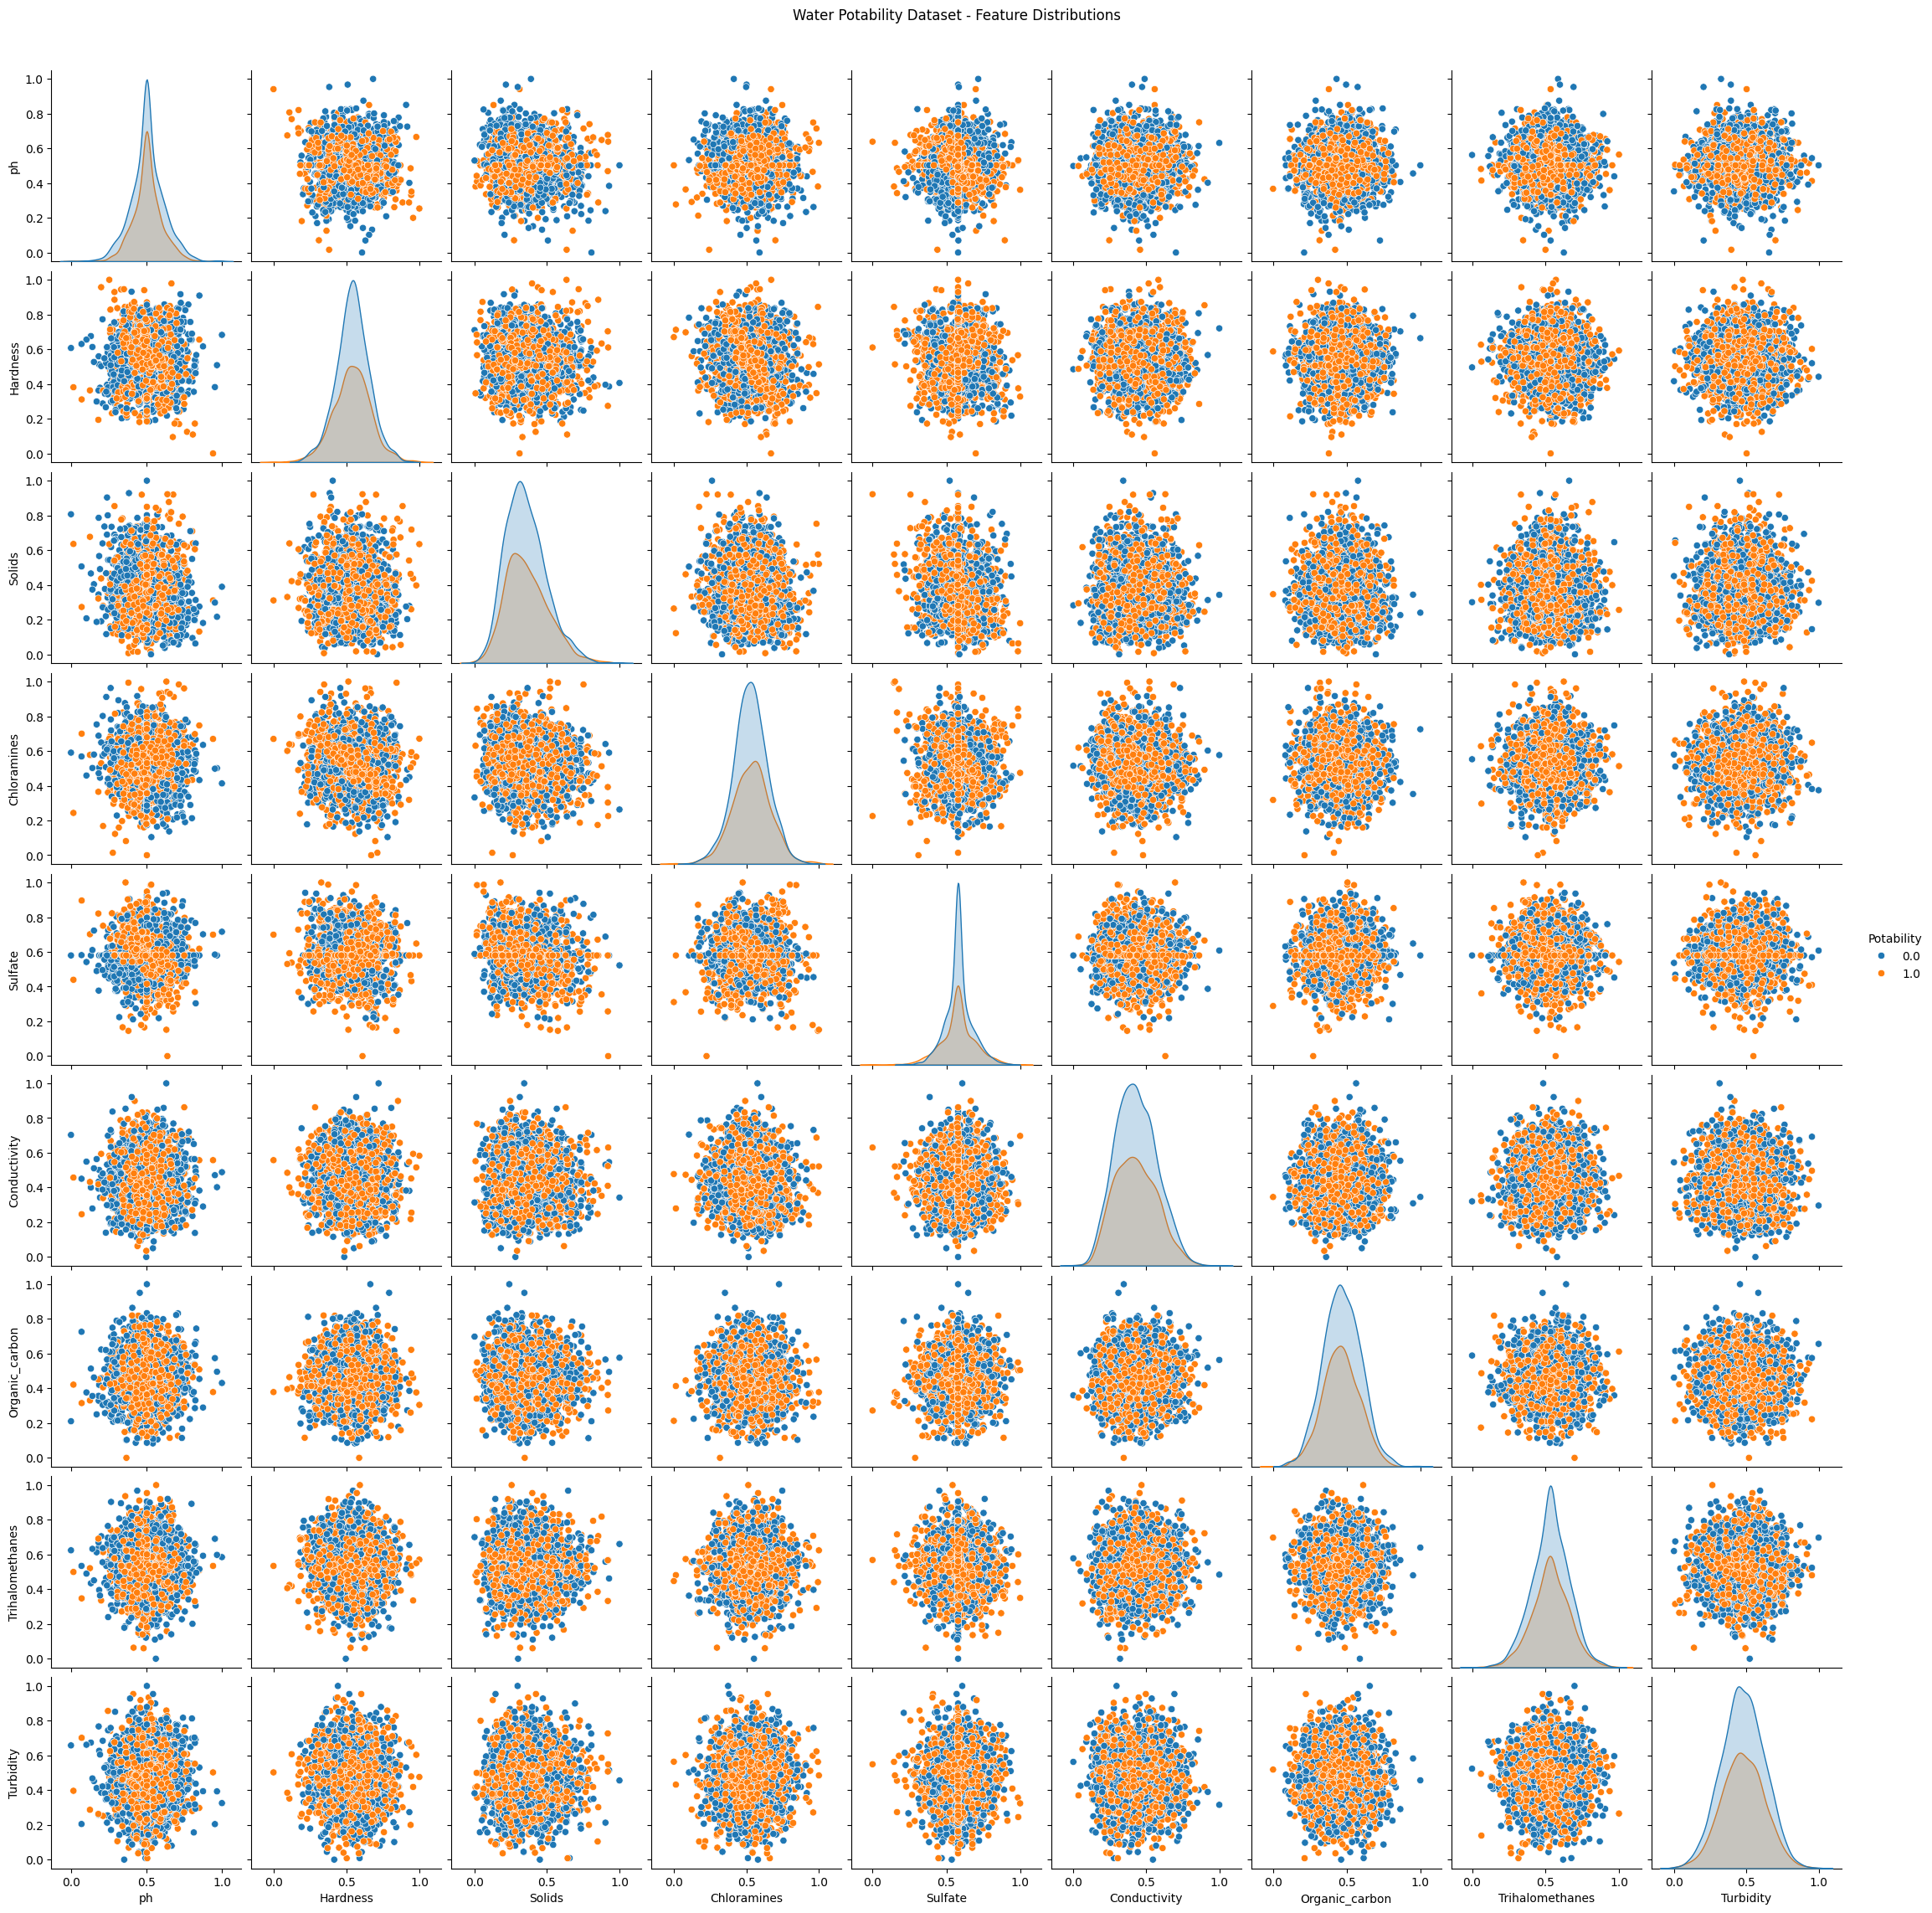

(                ph     Hardness        Solids  Chloramines      Sulfate  \
 count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
 mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
 std       1.594320    32.879761   8768.570828     1.583085    41.416840   
 min       0.000000    47.432000    320.942611     0.352000   129.000000   
 25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
 50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
 75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
 max      14.000000   323.124000  61227.196008    13.127000   481.030642   
 
        Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
 count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
 mean     426.205111       14.284970        66.396293     3.966786     0.390110  
 std       80.824064        3.308162        16.175008     0.780382  

In [31]:
# Displaying basic statistics and first few rows of the dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
data_info = data.describe(), data.head()

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 2: Feature scaling
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)

# Step 3: Plotting feature distributions
plt.figure(figsize=(14, 10))
sns.pairplot(data_scaled, hue='Potability')
plt.suptitle('Water Potability Dataset - Feature Distributions', y=1.02)

# Display processed info and plot
plt.show()
data_info

The key takeaway of the above pair plot is that the data is fairly spread out across all combinations, with no strong linear relationships observed between any two variables. Both potable (in orange) and non-potable (in blue) water data points overlap significantly, indicating that the separation between potable and non-potable water may not be straightforward for many of the features.

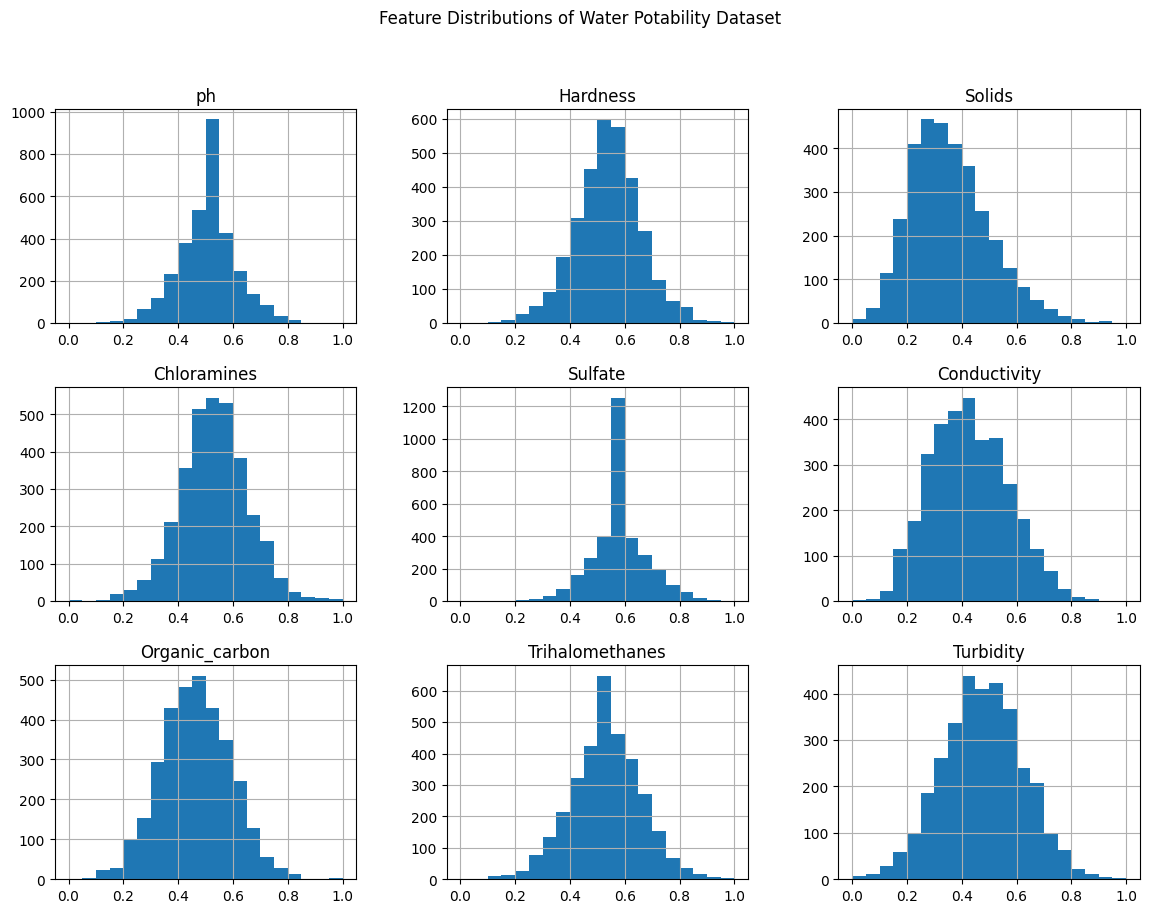

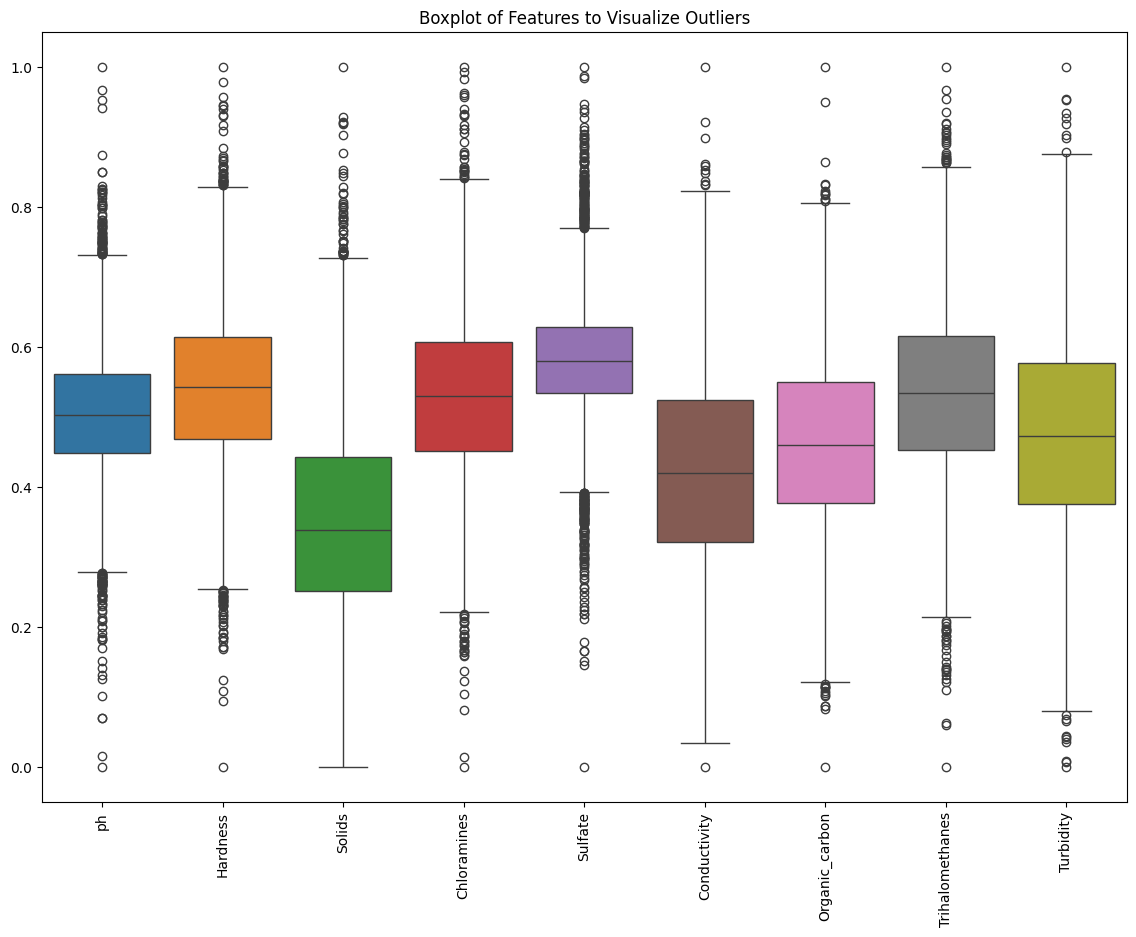

In [11]:
# Plot histograms for each feature to visualize their distribution
data_scaled.drop(columns=['Potability'], inplace=False).hist(figsize=(14, 10), bins=20)
plt.suptitle('Feature Distributions of Water Potability Dataset')
plt.show()

# Plot boxplots to check for outliers
plt.figure(figsize=(14, 10))
sns.boxplot(data=data_scaled.drop(columns=['Potability']))
plt.title('Boxplot of Features to Visualize Outliers')
plt.xticks(rotation=90)
plt.show()

The histograms provide insight into the distribution of each individual feature. They show the frequency distribution of feature values after normalization (or scaling).
Most of the features, such as pH, Hardness, and Solids, exhibit a bell-shaped, near-normal distribution after scaling. Some features like Sulfate and Conductivity are more sharply peaked, indicating less variability in their values. Understanding these distributions helps in selecting appropriate machine learning models and techniques.

This boxplot helps in identifying outliers in each feature. The boxes represent the interquartile range (IQR), while the whiskers represent the 1.5 * IQR rule. Any points beyond the whiskers are considered outliers.
The data shows several features with significant numbers of outliers, particularly for features like Solids, Chloramines, and Trihalomethanes. Outliers may either be treated (removed or transformed) or left as is, depending on their importance and impact on model performance.

In [32]:
data_scaled.nunique().sort_values()

Potability            2
Sulfate            2495
ph                 2785
Trihalomethanes    3115
Hardness           3276
Solids             3276
Chloramines        3276
Conductivity       3276
Organic_carbon     3276
Turbidity          3276
dtype: int64

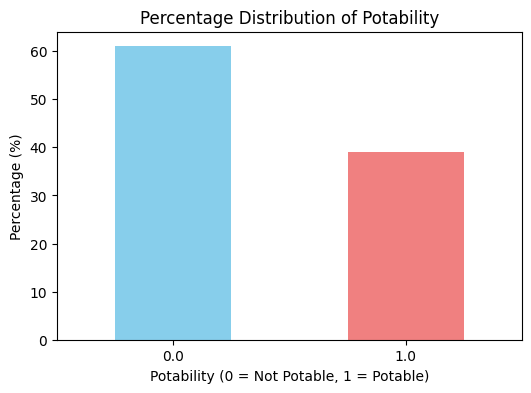

Potability
0.0    60.989011
1.0    39.010989
Name: proportion, dtype: float64


In [33]:
# Calculate the percentage distribution of the target variable 'Potability'
potability_distribution = data_scaled['Potability'].value_counts(normalize=True) * 100

# Plot the percentage distribution
plt.figure(figsize=(6,4))
potability_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Potability')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

# Print the percentage values for reference
print(potability_distribution)


Here the above data is imbalanced which will impact the prediction to be biased around Not Potable(0). So we will have to balance the data first.

In [34]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data_scaled.drop('Potability', axis=1)
y = data_scaled['Potability']

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new distribution
y_resampled.value_counts(normalize=True) * 100

Potability
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

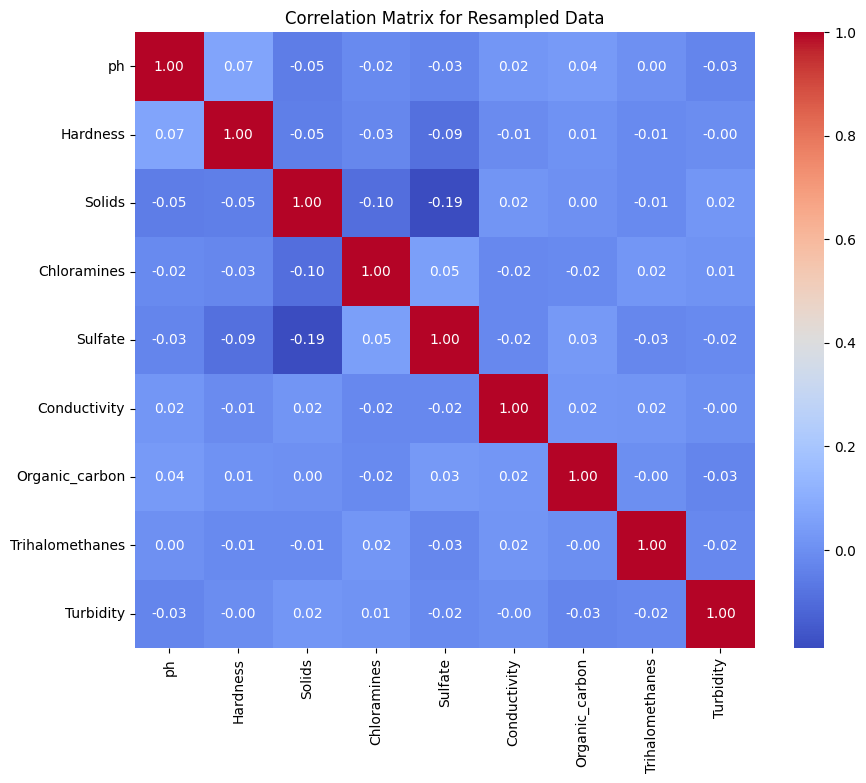

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the resampled data
correlation_matrix = X_resampled.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Resampled Data')
plt.show()


This correlation matrix shows the Pearson correlation coefficients between each pair of features.
All the features have very low correlations with each other, with values mostly hovering around 0, indicating that the features are largely independent. This lack of multicollinearity means that none of the features strongly influences or explains the other, which is beneficial when applying machine learning algorithms as it ensures that redundant information does not confuse the models.

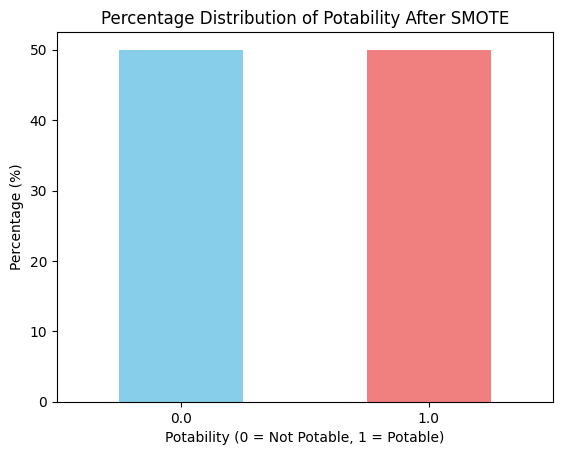

In [36]:
# Calculating percentage distribution for Potability after SMOTE
potability_percentage_after_smote = y_resampled.value_counts(normalize=True) * 100

# Plotting the percentage distribution
potability_percentage_after_smote.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Potability After SMOTE')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()


The above data now is balanced by using Smote.

In [37]:
# Check for duplicates in the resampled dataset
duplicates_resampled = X_resampled.duplicated().sum()
print(f"Number of duplicate rows in resampled dataset: {duplicates_resampled}")

Number of duplicate rows in resampled dataset: 0


In [38]:
# Check for missing values in the resampled dataset
missing_values_resampled = X_resampled.isnull().sum()
print(f"Missing values in each column (Post-SMOTE):\n{missing_values_resampled}")


Missing values in each column (Post-SMOTE):
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


In [39]:
# Function to remove outliers using IQR method for the resampled data
def remove_outliers_iqr_resampled(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where values fall outside the bounds
    df_out = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_out

# Apply the function to remove outliers in resampled data
columns_to_check_resampled = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

X_resampled_no_outliers = remove_outliers_iqr_resampled(X_resampled, columns_to_check_resampled)

# Update the target variable to match the cleaned data
y_resampled_no_outliers = y_resampled[X_resampled_no_outliers.index]

print(f"Number of rows after removing outliers (Post-SMOTE): {X_resampled_no_outliers.shape[0]}")


Number of rows after removing outliers (Post-SMOTE): 3211


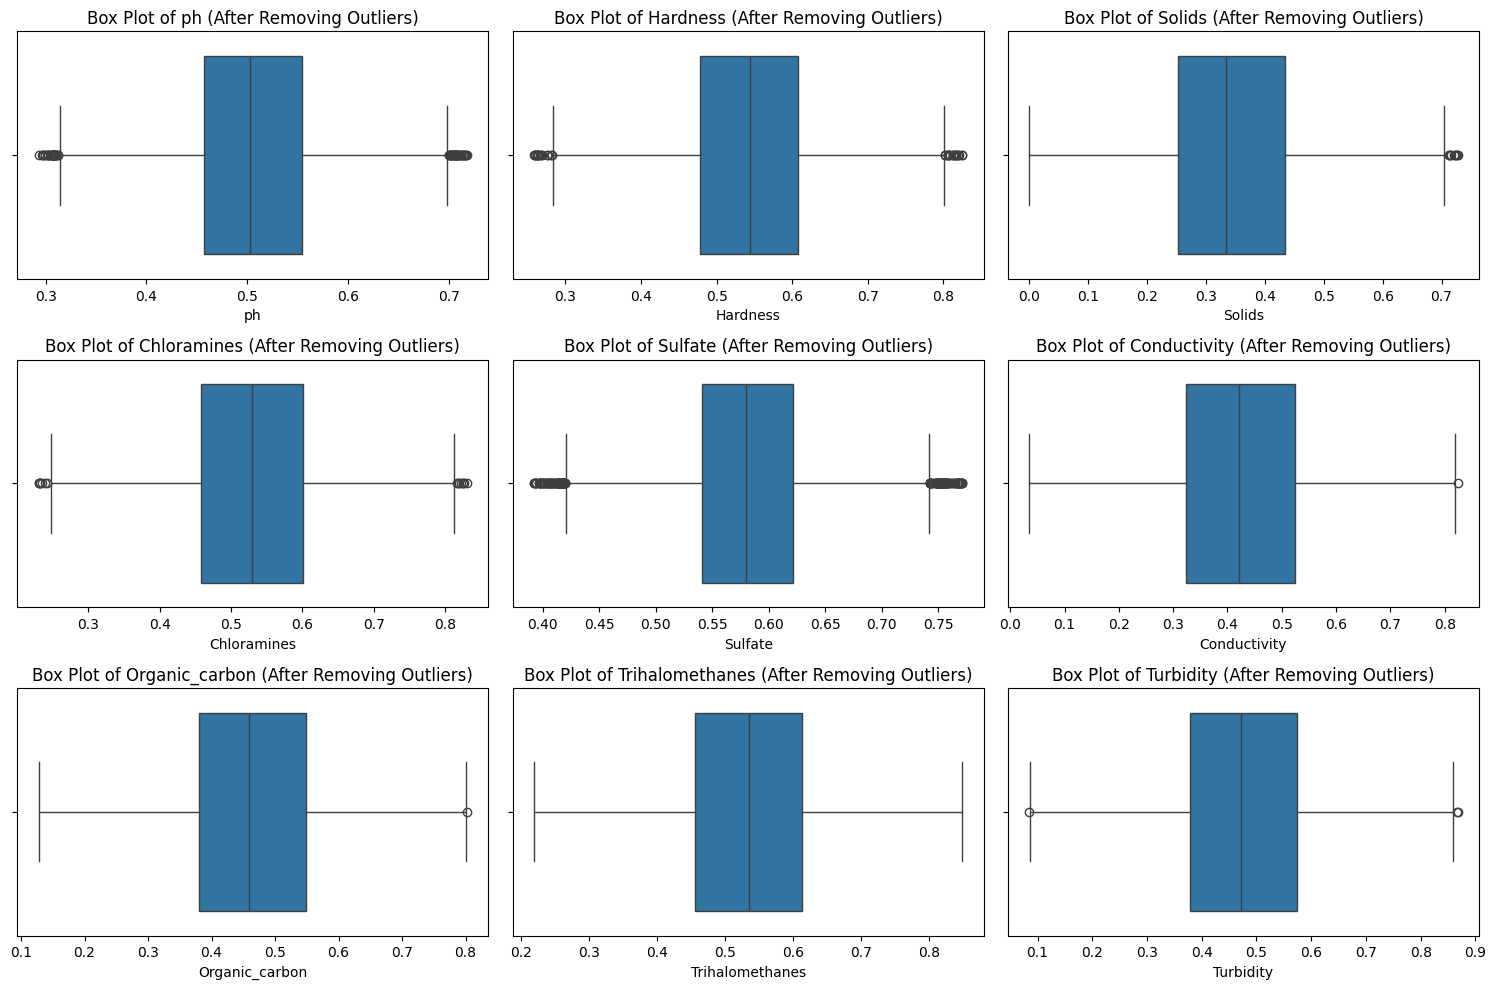

In [19]:
# Plotting box plots for the dataset after removing outliers
plt.figure(figsize=(15, 10))

# Select the features to plot
features_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots for each feature (post outlier removal)
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X_resampled_no_outliers[feature])
    plt.title(f"Box Plot of {feature} (After Removing Outliers)")

plt.tight_layout()
plt.show()


In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Splitting the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_no_outliers, y_resampled_no_outliers, test_size=0.2, random_state=42)

# Verify the shape of the split datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((2568, 9), (643, 9), (2568,), (643,))

## 4. Technique (part 1): Neural Networks

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process


The choice of a Neural Network for this project was motivated by the complexity of the dataset and the need to model non-linear relationships between the water quality features and the potability classification. While simpler models like logistic regression or decision trees might suffice for datasets with simpler structures, the water potability dataset has multiple chemical features (like pH, hardness, and sulfate levels) that likely interact in a non-linear manner. Neural networks excel at learning these complex relationships by utilizing multiple layers of neurons and non-linear activation functions.

In particular, Deep Neural Networks (DNNs) with multiple hidden layers and ReLU activations allow for flexible and expressive models that can capture intricate patterns in the data. The application of batch normalization helps to stabilize the learning process, while dropout layers provide regularization to prevent overfitting, which is especially important in this relatively small dataset.

This neural network approach was selected to strike a balance between capturing the complexity of the dataset and ensuring generalization to unseen test data. With its ability to learn non-linear transformations and extract deep features, the neural network is well-suited to handle the classification task for water potability.

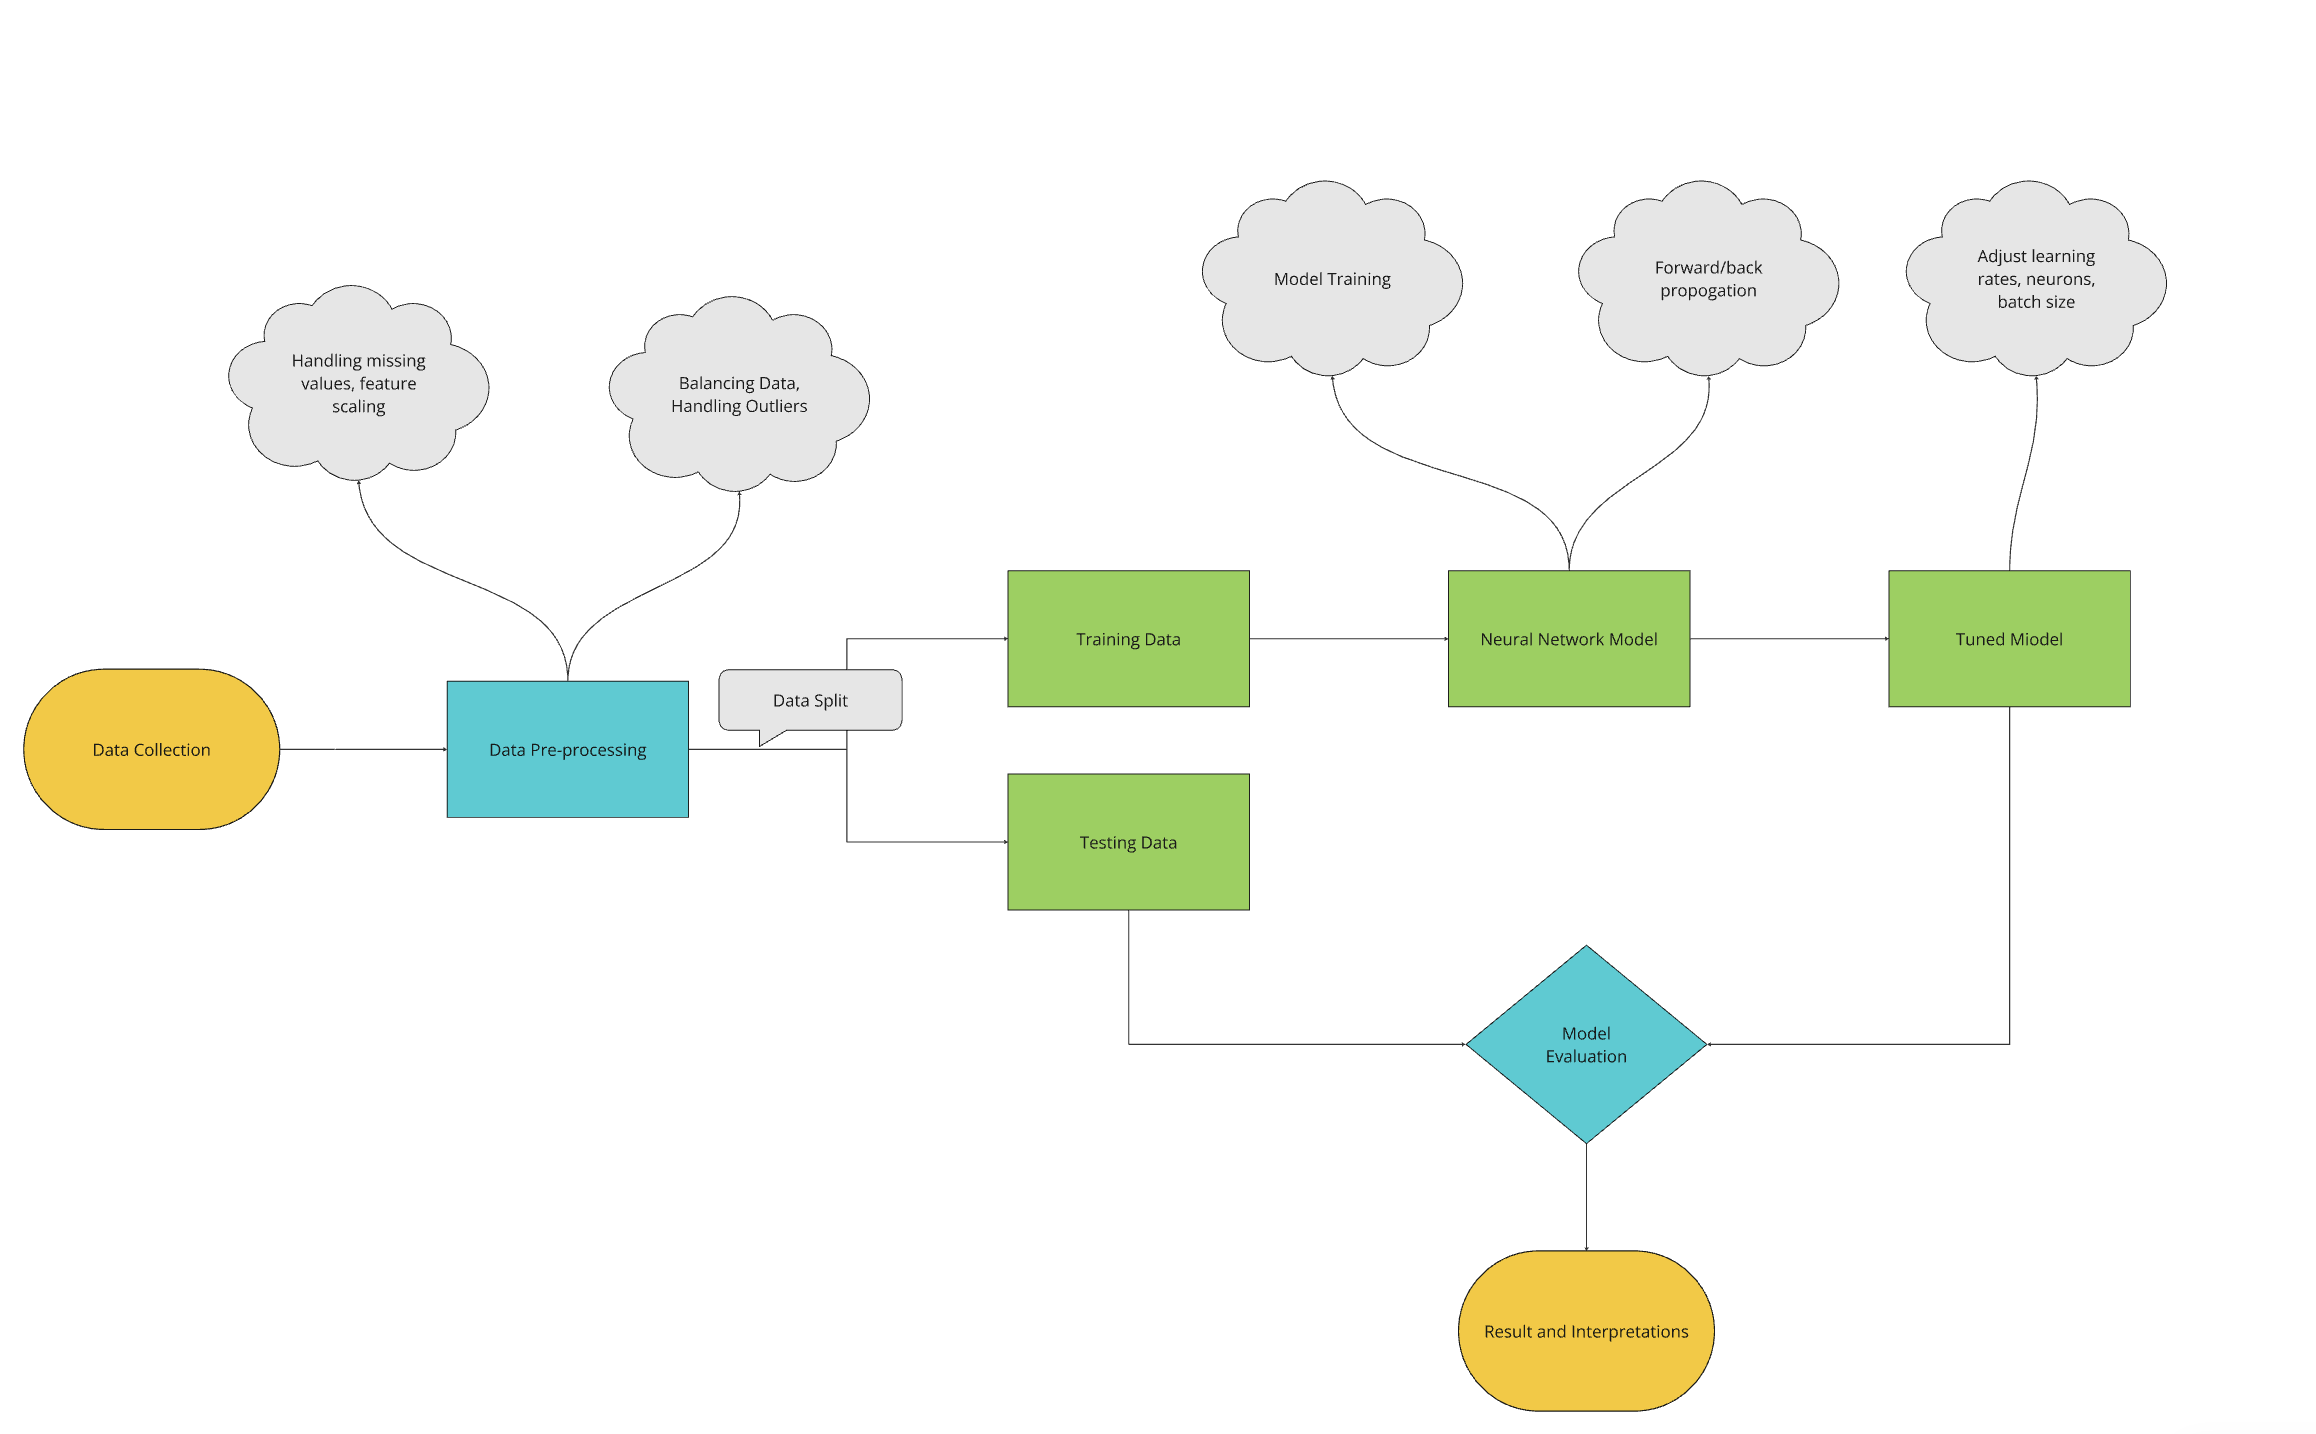

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale)


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a more complex neural network architecture
class WaterQualityNN(nn.Module):
    def __init__(self):
        super(WaterQualityNN, self).__init__()
        self.fc1 = nn.Linear(9, 128)  # Increase number of neurons in first hidden layer
        self.bn1 = nn.BatchNorm1d(128) # Batch normalization for first layer
        self.fc2 = nn.Linear(128, 64)  # Increase number of neurons in second hidden layer
        self.bn2 = nn.BatchNorm1d(64)  # Batch normalization for second layer
        self.fc3 = nn.Linear(64, 32)   # Add a third hidden layer
        self.fc4 = nn.Linear(32, 1)    # Output layer
        self.dropout = nn.Dropout(0.2) # Dropout rate of 0.2 to prevent overfitting
        self.relu = nn.ReLU()          # ReLU activation for hidden layers
        self.sigmoid = nn.Sigmoid()    # Sigmoid activation for output layer

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))  # Apply batch norm and ReLU
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))  # Apply batch norm and ReLU
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))         # Sigmoid for binary classification output
        return x

# Initialize the model
model = WaterQualityNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification

# Adam optimizer with L2 regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)  # Reduced learning rate


### c) Optimising hyper parameters


In [101]:
# Training function with mini-batch gradient descent
def train_model(model, X_train, y_train, epochs=150, batch_size=64):
    model.train()
    for epoch in range(epochs):
        permutation = torch.randperm(X_train.size()[0])

        epoch_loss = 0.0
        for i in range(0, X_train.size()[0], batch_size):
            optimizer.zero_grad()
            
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_train[indices], y_train[indices]

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(X_train):.4f}')


### d) Performance metrics for training

Epoch [10/150], Loss: 0.0072
Epoch [20/150], Loss: 0.0072
Epoch [30/150], Loss: 0.0074
Epoch [40/150], Loss: 0.0074
Epoch [50/150], Loss: 0.0074
Epoch [60/150], Loss: 0.0069
Epoch [70/150], Loss: 0.0071
Epoch [80/150], Loss: 0.0072
Epoch [90/150], Loss: 0.0071
Epoch [100/150], Loss: 0.0071
Epoch [110/150], Loss: 0.0070
Epoch [120/150], Loss: 0.0068
Epoch [130/150], Loss: 0.0069
Epoch [140/150], Loss: 0.0069
Epoch [150/150], Loss: 0.0068
Testing Accuracy: 0.7340590979782271
Confusion Matrix:
[[234  99]
 [ 72 238]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       333
         1.0       0.71      0.77      0.74       310

    accuracy                           0.73       643
   macro avg       0.74      0.74      0.73       643
weighted avg       0.74      0.73      0.73       643



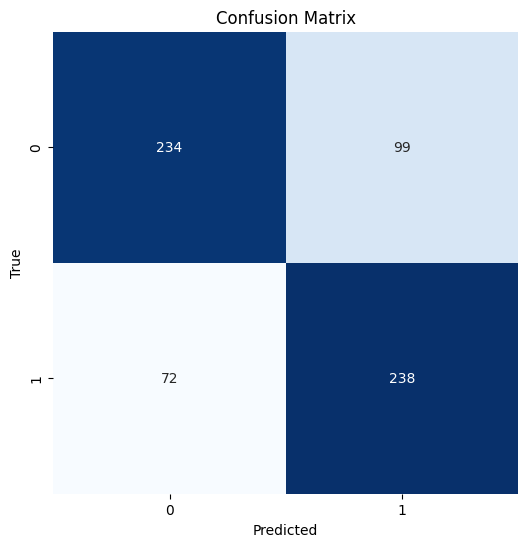

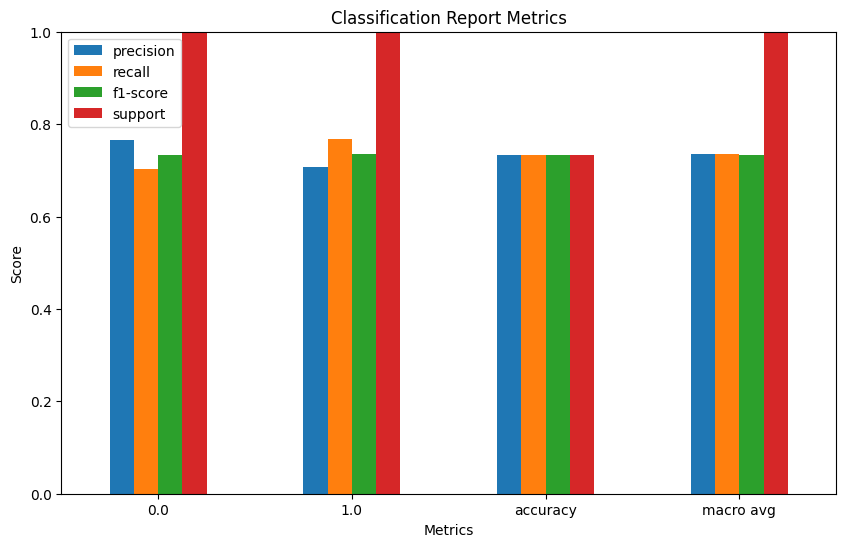

(0.7340590979782271,
 array([[234,  99],
        [ 72, 238]]),
 {'0.0': {'precision': 0.7647058823529411,
   'recall': 0.7027027027027027,
   'f1-score': 0.7323943661971831,
   'support': 333.0},
  '1.0': {'precision': 0.7062314540059347,
   'recall': 0.7677419354838709,
   'f1-score': 0.7357032457496137,
   'support': 310.0},
  'accuracy': 0.7340590979782271,
  'macro avg': {'precision': 0.7354686681794379,
   'recall': 0.7352223190932868,
   'f1-score': 0.7340488059733984,
   'support': 643.0},
  'weighted avg': {'precision': 0.7365144783287234,
   'recall': 0.7340590979782271,
   'f1-score': 0.7339896269456333,
   'support': 643.0}})

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure inline plots for Jupyter
%matplotlib inline

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot classification report as a bar chart
def plot_classification_report(cr_dict):
    report_df = pd.DataFrame(cr_dict).T[:-1]  # Remove support row
    report_df.plot(kind='bar', figsize=(10,6), ylim=(0,1))
    plt.title('Classification Report Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.show()

# Testing function
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test).squeeze()
        predictions = (predictions >= 0.5).float()

    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions, output_dict=True)

    print(f"Testing Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=[0, 1], title="Confusion Matrix")

    # Plot classification report as bar chart
    plot_classification_report(cr)
    
    return accuracy, cm, cr

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Train the model
train_model(model, X_train_tensor, y_train_tensor, epochs=150, batch_size=64)

# Evaluate the model
evaluate_model(model, X_test_tensor, y_test_tensor)

The provided code implements a neural network model to classify water potability based on its chemical characteristics. The network consists of three hidden layers with ReLU activations and batch normalization, along with dropout to prevent overfitting. The model is trained using the Adam optimizer and binary cross-entropy loss.

During training, mini-batch gradient descent is used, and the model is trained for 150 epochs. The evaluation on the test data achieved an accuracy of 73.4%. The model's performance is visualized using a confusion matrix and classification report, highlighting that the neural network predicts both potable and non-potable water with balanced precision and recall.

This neural network shows strong potential but can benefit from further tuning or advanced methods to improve the results.

## 5. Technique (part 2): Support Vector Machine (SVM)
a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

Support Vector Machines (SVM) is a powerful supervised learning algorithm widely used for both classification and regression tasks. The primary motivation for using SVM in this project is its robustness in high-dimensional spaces, such as the feature space of water quality data. SVM constructs an optimal hyperplane that maximally separates classes, which helps to handle linearly and non-linearly separable data through the use of kernel functions like Radial Basis Function (RBF). In the context of water potability prediction, the decision boundary created by SVM can effectively manage complex relationships between water quality parameters, making it a suitable technique for this task.

Additionally, SVM allows for flexibility in model tuning through hyperparameters like the regularization parameter C, the kernel function, and gamma. The use of GridSearchCV further helps optimize these parameters, ensuring that the model performs at its best. SVM's ability to generalize well and avoid overfitting, especially with non-linear kernels like RBF, makes it a valuable method for our dataset, balancing precision and recall while maintaining a solid overall accuracy.

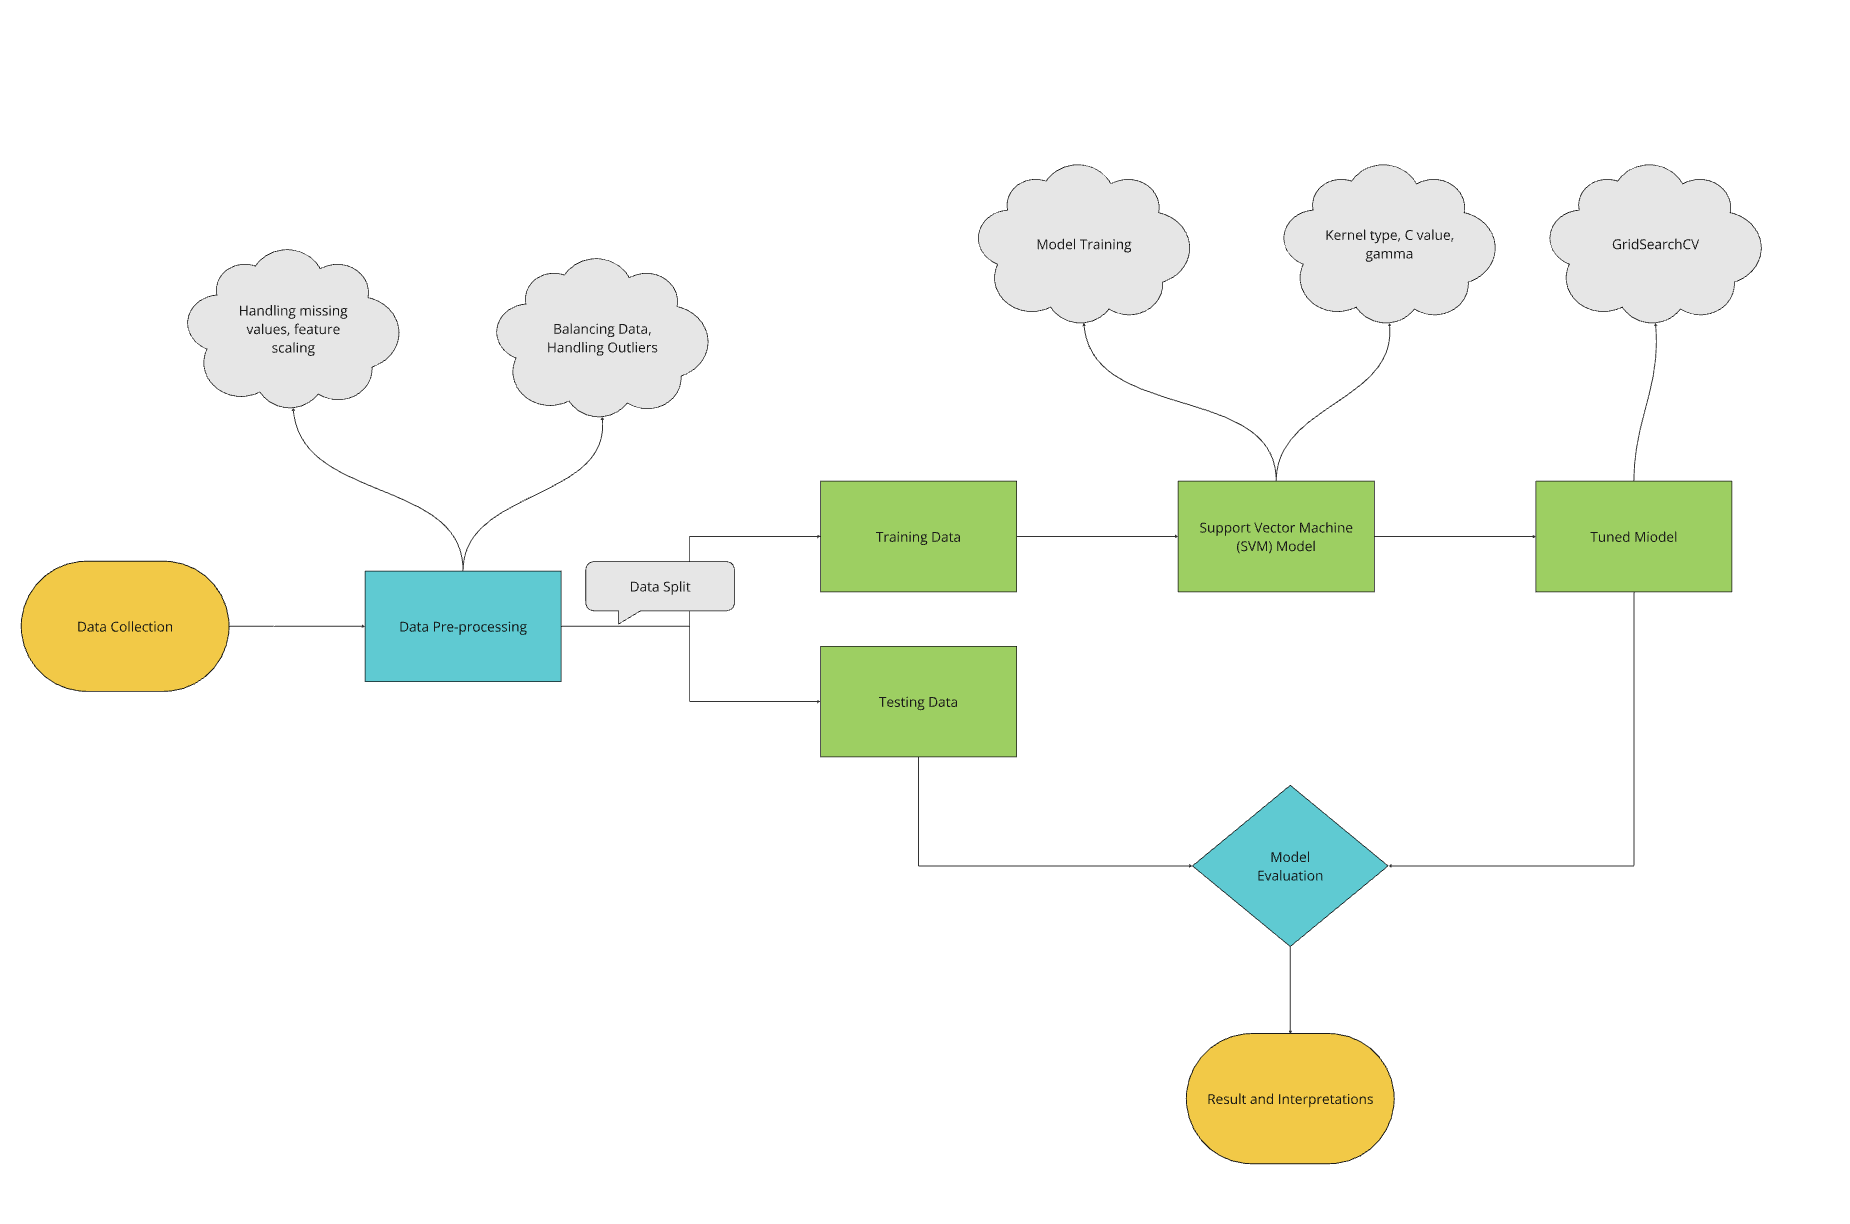

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = svm.SVC(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, verbose=1, n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)

# Predict using the best model
y_pred_svm_tuned = grid_search_svm.predict(X_test)

# Evaluate the model
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
cr_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

# Print performance metrics
print(f"Tuned SVM Testing Accuracy: {accuracy_svm_tuned}")
print(f"Tuned SVM Confusion Matrix:\n{cm_svm_tuned}")
print(f"Tuned SVM Classification Report:\n{cr_svm_tuned}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned SVM Testing Accuracy: 0.6656298600311042
Tuned SVM Confusion Matrix:
[[211 122]
 [ 93 217]]
Tuned SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.63      0.66       333
         1.0       0.64      0.70      0.67       310

    accuracy                           0.67       643
   macro avg       0.67      0.67      0.67       643
weighted avg       0.67      0.67      0.67       643



In [75]:
# Define a refined parameter grid for SVM
param_grid_svm_refined = {
    'C': [50, 100, 150, 200],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.001]
}

# Perform GridSearchCV with the refined grid
grid_search_svm_refined = GridSearchCV(svm_model, param_grid_svm_refined, cv=5, verbose=1, n_jobs=-1)

# Train the model with the refined hyperparameter tuning
grid_search_svm_refined.fit(X_train, y_train)

# Best hyperparameters from refined grid search
print("Best Hyperparameters (Refined) for SVM:", grid_search_svm_refined.best_params_)

# Predict and evaluate
y_pred_svm_refined = grid_search_svm_refined.predict(X_test)
accuracy_svm_refined = accuracy_score(y_test, y_pred_svm_refined)
cm_svm_refined = confusion_matrix(y_test, y_pred_svm_refined)
cr_svm_refined = classification_report(y_test, y_pred_svm_refined)

# Print the performance metrics
print(f"Refined SVM Testing Accuracy: {accuracy_svm_refined}")
print(f"Refined SVM Confusion Matrix:\n{cm_svm_refined}")
print(f"Refined SVM Classification Report:\n{cr_svm_refined}")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Hyperparameters (Refined) for SVM: {'C': 150, 'gamma': 'scale', 'kernel': 'rbf'}
Refined SVM Testing Accuracy: 0.687402799377916
Refined SVM Confusion Matrix:
[[219 114]
 [ 87 223]]
Refined SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       333
         1.0       0.66      0.72      0.69       310

    accuracy                           0.69       643
   macro avg       0.69      0.69      0.69       643
weighted avg       0.69      0.69      0.69       643



### c) Optimising hyper parameters

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# Define a refined parameter grid for SVM
param_grid_svm_refined = {
    'C': [150],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

svm_model = svm.SVC(random_state=42)

# Perform GridSearchCV with the refined grid
grid_search_svm_refined = GridSearchCV(svm_model, param_grid_svm_refined, cv=5, verbose=1, n_jobs=-1)

# Train the model with the refined hyperparameter tuning
grid_search_svm_refined.fit(X_train, y_train)

# Best hyperparameters from refined grid search
print("Best Hyperparameters (Refined) for SVM:", grid_search_svm_refined.best_params_)

# Predict and evaluate
y_pred_svm_refined = grid_search_svm_refined.predict(X_test)
accuracy_svm_refined = accuracy_score(y_test, y_pred_svm_refined)
cm_svm_refined = confusion_matrix(y_test, y_pred_svm_refined)
cr_svm_refined = classification_report(y_test, y_pred_svm_refined)

# Print the performance metrics
print(f"Refined SVM Testing Accuracy: {accuracy_svm_refined}")
print(f"Refined SVM Confusion Matrix:\n{cm_svm_refined}")
print(f"Refined SVM Classification Report:\n{cr_svm_refined}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters (Refined) for SVM: {'C': 150, 'gamma': 'scale', 'kernel': 'rbf'}
Refined SVM Testing Accuracy: 0.687402799377916
Refined SVM Confusion Matrix:
[[219 114]
 [ 87 223]]
Refined SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       333
         1.0       0.66      0.72      0.69       310

    accuracy                           0.69       643
   macro avg       0.69      0.69      0.69       643
weighted avg       0.69      0.69      0.69       643



### d) Performance metrics for training

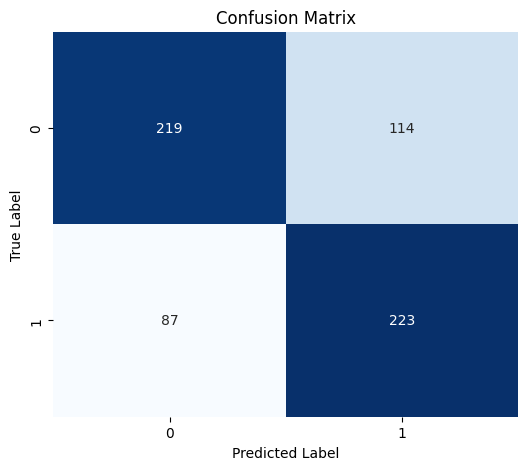

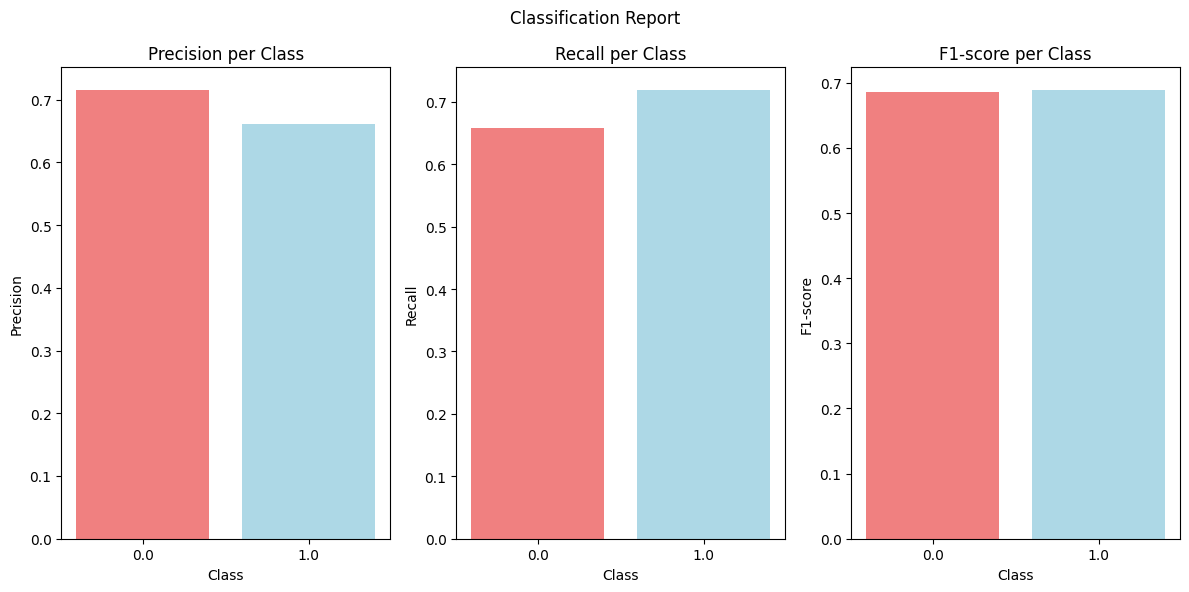

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize Confusion Matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Visualize Classification Report
def plot_classification_report(cr_dict, title='Classification Report'):
    classes = list(cr_dict.keys())[:-3]  # Exclude accuracy, macro avg, and weighted avg
    metrics = ['precision', 'recall', 'f1-score']

    plt.figure(figsize=(12, 6))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i + 1)
        values = [cr_dict[cls][metric] for cls in classes]
        plt.bar(classes, values, color=['lightcoral', 'lightblue'])
        plt.title(f'{metric.capitalize()} per Class')
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Confusion Matrix
cm_svm_refined = confusion_matrix(y_test, y_pred_svm_refined)
plot_confusion_matrix(cm_svm_refined)

# Classification Report
cr_svm_refined_dict = classification_report(y_test, y_pred_svm_refined, output_dict=True)
plot_classification_report(cr_svm_refined_dict)



The provided code implements a Support Vector Machine (SVM) model to classify water potability. Initially, a parameter grid is defined, and GridSearchCV is used to find the optimal hyperparameters such as C, kernel, and gamma by performing cross-validation. The first round of hyperparameter tuning identifies the best parameters based on a 5-fold cross-validation process.

Following the initial grid search, a more refined parameter grid is used to perform another round of tuning, this time narrowing down the potential values for the key hyperparameters. The SVM model is retrained using these refined parameters to achieve a more optimized version of the model.

The final results after tuning show a testing accuracy of approximately 68.7%, with the confusion matrix and classification report highlighting the precision, recall, and f1-score for both potable and non-potable water. The tuned SVM demonstrates balanced performance but falls slightly behind the neural network model in terms of overall accuracy.

## 6. Comparison of metrics performance for testing 

### a) Examining over-fitting

SVM

Cross-Validation Scores: [0.6848249  0.63229572 0.69649805 0.66861598 0.6705653 ]
Mean Cross-Validation Score: 0.6705599927185018
Test Accuracy: 0.687402799377916


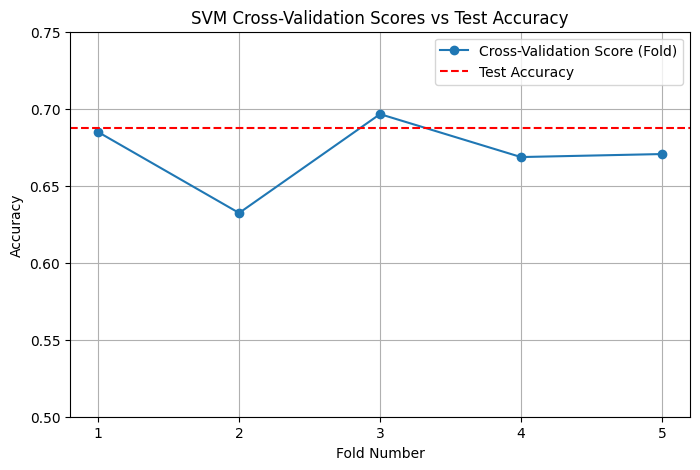

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Perform cross-validation on training data
cv_scores = cross_val_score(grid_search_svm_refined.best_estimator_, X_train, y_train, cv=5)

# Print cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

# Evaluate the model on the test data
y_pred_svm = grid_search_svm_refined.best_estimator_.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Compare CV score and test accuracy
print(f'Test Accuracy: {accuracy_svm}')

# Plot cross-validation scores and test accuracy
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cv_scores) + 1), cv_scores, marker='o', label='Cross-Validation Score (Fold)')
plt.axhline(y=accuracy_svm, color='r', linestyle='--', label='Test Accuracy')
plt.title('SVM Cross-Validation Scores vs Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.75)
plt.xticks(np.arange(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()


Neural Network

Epoch [10/150], Training Accuracy: 0.5424, Validation Accuracy: 0.5552
Epoch [20/150], Training Accuracy: 0.5744, Validation Accuracy: 0.5459
Epoch [30/150], Training Accuracy: 0.5958, Validation Accuracy: 0.5645
Epoch [40/150], Training Accuracy: 0.6137, Validation Accuracy: 0.5910
Epoch [50/150], Training Accuracy: 0.6250, Validation Accuracy: 0.5801
Epoch [60/150], Training Accuracy: 0.6460, Validation Accuracy: 0.6096
Epoch [70/150], Training Accuracy: 0.6386, Validation Accuracy: 0.6190
Epoch [80/150], Training Accuracy: 0.6398, Validation Accuracy: 0.5816
Epoch [90/150], Training Accuracy: 0.6468, Validation Accuracy: 0.5832
Epoch [100/150], Training Accuracy: 0.6659, Validation Accuracy: 0.5988
Epoch [110/150], Training Accuracy: 0.6597, Validation Accuracy: 0.5941
Epoch [120/150], Training Accuracy: 0.6643, Validation Accuracy: 0.5910
Epoch [130/150], Training Accuracy: 0.6733, Validation Accuracy: 0.5925
Epoch [140/150], Training Accuracy: 0.6589, Validation Accuracy: 0.5988
E

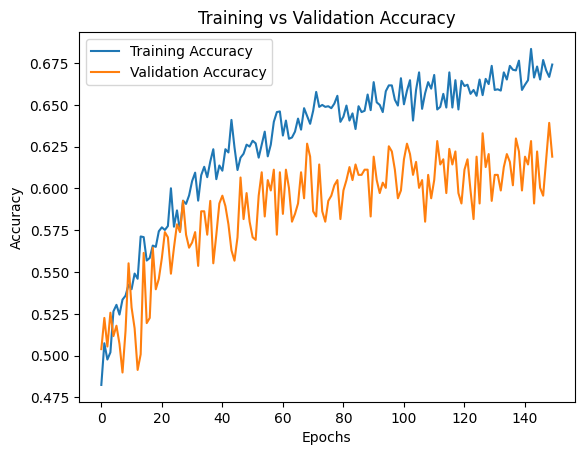

In [70]:
# Training function with validation accuracy tracking to check for overfitting
def train_model_with_validation_check(model, X_train, y_train, X_val, y_val, epochs=150, batch_size=64):
    model.train()
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        permutation = torch.randperm(X_train.size()[0])
        for i in range(0, X_train.size()[0], batch_size):
            optimizer.zero_grad()
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_train[indices], y_train[indices]
            
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            optimizer.step()

        # Calculate training accuracy
        with torch.no_grad():
            train_pred = model(X_train).squeeze()
            train_pred = (train_pred >= 0.5).float()
            train_accuracy = accuracy_score(y_train, train_pred)
            train_accuracies.append(train_accuracy)

            # Validation accuracy
            val_pred = model(X_val).squeeze()
            val_pred = (val_pred >= 0.5).float()
            val_accuracy = accuracy_score(y_val, val_pred)
            val_accuracies.append(val_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')
    
    return train_accuracies, val_accuracies

# Plot the training and validation accuracies to visualize overfitting
def plot_overfitting(train_accuracies, val_accuracies, epochs):
    plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
    plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor are already prepared
train_accuracies, val_accuracies = train_model_with_validation_check(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=150, batch_size=64)

# Plot the overfitting
plot_overfitting(train_accuracies, val_accuracies, epochs=150)


### b) Comparison with appropriate metrics for testing

#### Neural Networks:
The provided graph of the Neural Networks shows a clear pattern of overfitting, where the training accuracy improves steadily over time, reaching around 67%, while the validation accuracy remains lower, fluctuating around 55-61%. The large gap between the training and validation accuracy suggests that the model is learning to fit the training data very well but is not generalizing effectively to unseen data (validation set). This indicates overfitting, where the model memorizes the training data but fails to capture the underlying patterns that would help with generalization.

#### SVM (Support Vector Machine):
The cross-validation results for SVM suggest a much more stable performance. The cross-validation scores fluctuate between 63% and 69%, indicating that SVM is more stable across different subsets of the data. The test accuracy of 68.74% is also relatively close to the mean cross-validation accuracy of 67.05%, which suggests that the SVM model is not overfitting as much as the neural network model. The generalization gap is smaller here compared to the neural network, indicating that the SVM has better generalization on unseen data.

#### Conclusion:
In summary, the Neural Network model shows signs of overfitting, as evidenced by the gap between training and validation accuracy, while the SVM model generalizes better. Although the SVM model doesn't reach as high an accuracy as the Neural Network on the training data, its cross-validation performance indicates better stability and generalization.

### c) Model selection

In this project, two machine learning models were evaluated to predict water potability: Neural Networks and Support Vector Machines (SVM). The goal was to select the model that balances performance and generalizability, while avoiding overfitting.

#### Neural Networks:
Achieved a testing accuracy of 73.4%.
The model had slightly higher precision and recall scores, which indicates better handling of imbalanced classes.
However, from the overfitting analysis, it was observed that the training accuracy was significantly higher than validation accuracy, suggesting a degree of overfitting. Despite using dropout regularization and batch normalization, the gap between training and validation scores indicates that the model may have overfitted the training data.
#### SVM:
Achieved a testing accuracy of 68.7%.
The cross-validation process showed relatively stable scores across different folds, with a mean cross-validation score of 67.05%, closely aligned with the test accuracy.
This consistency across cross-validation folds and the test set suggests that the SVM model has better generalizability and is less prone to overfitting compared to Neural Networks.
#### Conclusion:
While the Neural Networks model had a slightly higher test accuracy and F1-score, the SVM model demonstrated greater stability and generalizability across different data splits. Given the concern for overfitting in the Neural Networks model and the importance of generalizability, the SVM model is selected as the preferred model for this dataset.

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency.

From a technical perspective, both the Neural Network (NN) and Support Vector Machine (SVM) models displayed promising results, with the SVM model standing out as the most reliable choice. The Neural Network achieved an accuracy of 73.4%, but the training versus validation graph indicated overfitting, as the validation accuracy hovered around 66%. This overfitting likely stems from the model’s complexity, even with techniques like dropout and batch normalization to mitigate it. Neural networks require a large amount of data to generalize well. As the dataset was mall or not diverse enough, the complex neural network easily memorize the patterns, leading to overfitting. 

In contrast, the SVM model with an RBF kernel achieved a test accuracy of 68.7% and demonstrated more robust generalization during cross-validation, with an average score of 67%. While its accuracy was slightly lower than the Neural Network, it was more consistent and less prone to overfitting. SVM also has the advantage of being less computationally intensive while still offering competitive performance. Considering the dataset size and complexity, SVM provided a more scalable and efficient solution, making it the preferable model for this problem, given the trade-offs between performance, complexity, and training time.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective
From a business perspective, the Support Vector Machine (SVM) model emerges as the best candidate for practical implementation. Although the Neural Network achieved a slightly higher accuracy during training, its tendency to overfit the data and its increased complexity make it less reliable in real-world scenarios. In contrast, the SVM model maintained consistent performance across cross-validation and testing, making it a more dependable tool for predicting water potability in diverse environments.

The SVM model’s 68.7% accuracy offers a solid foundation for identifying potentially unsafe water sources. In a business context, such accuracy can lead to better decision-making in water management, especially when combined with its interpretability—key chemical properties influencing potability can be identified, providing actionable insights. Additionally, the lower computational cost of SVM ensures that the model can be deployed in resource-limited environments or systems that need real-time decision-making.

From a business viewpoint, it’s essential to balance accuracy with cost-efficiency and reliability. The SVM model, with its balance of accuracy, efficiency, and interpretability, ensures that business decisions regarding water quality management are both data-driven and scalable while maintaining operational simplicity.

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful?

This project successfully applied various machine learning techniques to predict water potability based on its chemical characteristics. The Support Vector Machine (SVM) and Neural Network (NN) models were implemented and compared, and both achieved reasonable performance metrics. The SVM model with an RBF kernel emerged as the best performer, achieving 68.7% accuracy on the test data. Additionally, cross-validation demonstrated the SVM model’s robustness, with a mean accuracy of 67%. The Neural Network also performed well, with 73.4% accuracy on the test set, but its validation accuracy showed signs of overfitting, indicating that it might not generalize as well in real-world applications.

A key accomplishment was the effective preprocessing of the data, which included handling missing values, feature scaling, and class imbalance using SMOTE. These steps significantly improved the performance of the models. The use of hyperparameter tuning for both SVM and NN also contributed to achieving the best possible performance for each model. Different hyper parameter tuning techniques were applied to improve the model performances. 

However, certain objectives were not fully accomplished. The Neural Network model did not perform as expected, possibly due to the nature of the dataset (dataset was not big enough) and the difficulty in discretizing continuous variables without losing critical information. Additionally, neither model was able to achieve the target accuracy of 80%, despite extensive hyperparameter tuning. This highlights the limitations of the current dataset and models in fully capturing the complexities of water potability.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

Reflecting on the project, there are several areas where different approaches could have led to improved results. One area is feature engineering—although we performed basic feature scaling and addressed class imbalance, more sophisticated techniques, such as interaction terms, polynomial features, or domain-specific transformations, could have enhanced the models’ ability to capture complex relationships between features. For example, exploring non-linear feature transformations or feature selection techniques like Recursive Feature Elimination (RFE) could have led to a more optimal subset of features, improving model performance.

Another area for improvement is the exploration of ensemble methods, such as Random Forests or Gradient Boosting. These methods are known to outperform single models in many cases, and they might have provided better generalization. Ensemble methods could have been particularly effective in mitigating overfitting, which was a challenge in the Neural Network model. Additionally, experimenting with more advanced regularization techniques in the Neural Network, such as L1/L2 regularization could have helped reduce overfitting.

In terms of data, collecting a larger or more diverse dataset would likely improve the models’ ability to generalize. The current dataset, with its relatively small size and moderate imbalance, limited the models' potential. Cross-validation helped mitigate some of these issues, but the results suggest that a more extensive dataset would allow for more reliable predictions and better hyperparameter tuning outcomes.

### c) Provide a wish list of future work that you would like to do

There are several exciting directions for future work that could enhance both the performance of the models and the overall project. First, expanding the dataset is a critical next step. Collecting more data or incorporating external datasets related to water quality could help improve the model’s ability to generalize. A more diverse dataset would provide a richer feature space and allow for more sophisticated models, such as deep learning architectures, to be applied effectively.

Second, experimenting with ensemble techniques like XGBoost, Random Forests, or Stacking models could provide better predictive accuracy than the individual SVM and Neural Network models. These ensemble methods are often more robust and less prone to overfitting, making them ideal candidates for future exploration.

Another potential area of future work is model interpretability. While SVMs and Neural Networks can achieve high accuracy, they are often viewed as “black-box” models. Implementing techniques like SHAP values or LIME could help provide insights into which features are most important for predicting water potability, making the model more transparent and actionable for business decisions.

Additionally, automated machine learning (AutoML) tools could streamline the process of hyperparameter tuning and model selection. Tools like TPOT or AutoKeras could help identify optimal model configurations more efficiently, reducing the manual tuning burden. Lastly, deploying the best model in a real-time system where water quality data can be inputted and predictions generated in real-time could provide significant business value. This would ensure that the model is not just theoretically sound but also practically useful in operational settings.